## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej (y) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

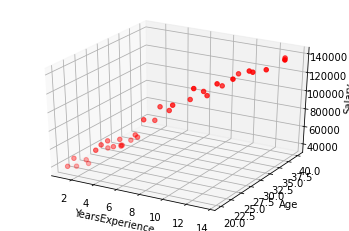

[[ 1.1 20.   1. ]
 [ 1.3 21.   1. ]
 [ 1.5 21.   1. ]
 [ 2.  22.   1. ]
 [ 2.2 22.   1. ]
 [ 2.9 22.   1. ]
 [ 3.  23.   1. ]
 [ 3.2 24.   1. ]
 [ 3.2 24.   1. ]
 [ 3.7 24.   1. ]
 [ 3.9 25.   1. ]
 [ 4.  25.   1. ]
 [ 4.  25.   1. ]
 [ 4.1 25.   1. ]
 [ 4.5 26.   1. ]
 [ 4.9 26.   1. ]
 [ 5.1 26.   1. ]
 [ 5.3 27.   1. ]
 [ 5.9 28.   1. ]
 [ 6.  29.   1. ]
 [ 6.8 29.   1. ]
 [ 7.1 29.   1. ]
 [ 7.9 31.   1. ]
 [ 8.2 31.   1. ]
 [ 8.7 32.   1. ]
 [ 9.  32.   1. ]
 [ 9.5 33.   1. ]
 [ 9.6 34.   1. ]
 [10.3 36.   1. ]
 [10.5 34.   1. ]
 [11.2 36.   1. ]
 [11.5 36.   1. ]
 [12.3 37.   1. ]
 [12.9 40.   1. ]
 [13.5 38.   1. ]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  62444.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872. 127345. 126756. 128765. 135675. 139465.]


In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# create arrays for the data points
X = []
Y = []

#read the csv file
csvReader = open('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/Salary.csv')

#skips the header line
csvReader.readline()

for line in csvReader:
    x, x2, y = line.split(',')
    X.append([float(x), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))
#print(type(X[1]))
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r')
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
plt.show()

print(X)
print(Y)


#df = pd.read_csv('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/Salary.csv', sep=',')
#x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
#x2 = df['Age'].values.reshape(df['Age'].shape[0], 1)
#y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

#df.head()
#print(x)
#print(y)
#print(x2)

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''

df = pd.read_csv('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/Salary.csv', sep=',')
x1 = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
b = df['Age'].values.reshape(df['Age'].shape[0], 1)
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

#print(a)
#print(b)

X = np.array(list(zip(x1,b)))

#print(X)

def giveSingleXValue(X):
    transpose = [[row[i] for row in X] for i in range(2)]
    xa = (transpose[0])
    xb = (transpose[1])

    x = np.array(xa)
    x2 = np.array(xb)
    
    return(x, x2)

def initializationBCoefficient():
    b_0 = random.uniform(0, 1)
    b_1 = random.uniform(0, 1)
    b_2 = random.uniform(0, 1)
    return b_0, b_1, b_2

def calculationPrediction(x, x2, b_0, b_1, b_2):
    f_x = b_0 + b_1 * x + b_2 * x2
    #print(f_x)
    return(f_x)

def ssrCalculation(f_x, y):
    #licznik = 0
    #suma = 0
    #print("f_x")
    #print(f_x)
    #print("y")
    #print(y)

    sumka = np.sum((f_x - y) ** 2)
    #print(sumka)

    #while licznik < len(y):
    #    suma += (f_x[licznik] - y[licznik])**2
    #    licznik += 1

    #print(suma)

    #if(suma == sumka):
    #    print("tak")
    #else:
    #    print("nie")


    #ssr2 = (1 / 2 * len(y)) * suma
    #print(ssr2)
    ssr = (1/(2 * len(y))) * sumka
    #print(ssr)
    return ssr

def gradientCalculation(f_x, y, x, x2):
    pochb_0 = np.sum((f_x - y)) / len(y)
    pochb_1 = np.sum((f_x - y) * x) / len(y)
    pochb_2 = np.sum((f_x - y) * x2) / len(y)

    return pochb_0, pochb_1, pochb_2

def learn_and_fit(X, y):

    b0 = []
    b1 = []
    b2 = []
    #betas = []
    error = []
    b_0, b_1, b_2 = initializationBCoefficient()
    alpha = 0.0005
    #print(alpha)
    epochNumber = 0
    x, x2 = giveSingleXValue(X)
    while(epochNumber<10):
        
        f_x = calculationPrediction(x, x2, b_0, b_1, b_2)
        print(f_x)
        ssr = ssrCalculation(f_x, y)
        print("ssr", ssr)
        pochb_0, pochb_1, pochb_2 = gradientCalculation(f_x, y, x, x2)
        #print (ssr)
        b0.append(b_0)
        b1.append(b_1)
        b2.append(b_2)
        #betas.append(b_1)
        #betas.append(b_2)
        error.append(ssr)
        #print(b_0)
        #print(b_1)
        #print(b_2)
        #print(ssr)
        b_0 = b_0 - (alpha * (pochb_0))
        b_1 = b_1 - (alpha * (pochb_1))
        b_2 = b_2 - (alpha * (pochb_2))
        #print(b_0)
        #print(b_1)
        #print(b_2)

        epochNumber += 1


    #return b0, b1, b2, error
    return b0, b1, b2, error

b0, b1, b2, error = learn_and_fit(X, y)
#b0, betas, error = learn_and_fit(X, y)
#print(error)

[[ 2.85184062]
 [ 3.10062803]
 [ 3.2696804 ]
 [ 3.77204636]
 [ 3.94109873]
 [ 4.53278201]
 [ 4.69704324]
 [ 4.94583065]
 [ 4.94583065]
 [ 5.36846157]
 [ 5.61724898]
 [ 5.70177517]
 [ 5.70177517]
 [ 5.78630135]
 [ 6.20414113]
 [ 6.54224587]
 [ 6.71129823]
 [ 6.96008564]
 [ 7.54697779]
 [ 7.71123902]
 [ 8.38744849]
 [ 8.64102704]
 [ 9.4767066 ]
 [ 9.73028515]
 [10.23265111]
 [10.48622966]
 [10.98859563]
 [11.15285685]
 [11.90401023]
 [11.91359251]
 [12.66474588]
 [12.91832444]
 [13.67426895]
 [14.42063118]
 [14.7683182 ]]
ssr 4021473592.518021
[[25901.25326695]
 [27240.75438339]
 [27304.9638087 ]
 [28740.77906309]
 [28804.98848839]
 [29029.72147696]
 [30337.11788074]
 [31676.61899718]
 [31676.61899718]
 [31837.14256044]
 [33176.64367688]
 [33208.74838953]
 [33208.74838953]
 [33240.85310219]
 [34644.56364393]
 [34772.98249453]
 [34837.19191984]
 [36176.69303628]
 [37644.61300332]
 [38952.00940711]
 [39208.84710833]
 [39305.16124628]
 [42112.58232977]
 [42208.89646772]
 [43644.71172212]
 [

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Pokaż w formie animacji, jak zmieniała się regresja w kolejnych epokach.

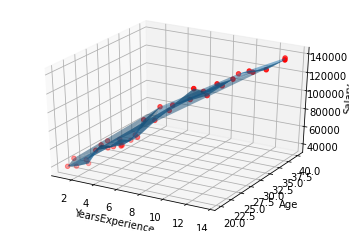

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

# create arrays for the data points
X = []
Y = []

#read the csv file
csvReader = open('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/Salary.csv')

#skips the header line
csvReader.readline()

for line in csvReader:
    x, x2, y = line.split(',')
    X.append([float(x), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r')
ax.plot_trisurf(X[:, 0], X[:, 1], Y, alpha=0.5)
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
plt.show()


### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [9]:
dane = pd.read_csv('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/multi_variable_regression.csv')
d1 = dane['x1'].values.reshape(dane['x1'].shape[0], 1)
d2 = dane['x2'].values.reshape(dane['x2'].shape[0], 1)
d3 = dane['x3'].values.reshape(dane['x3'].shape[0], 1)
d4 = dane['x4'].values.reshape(dane['x4'].shape[0], 1)
d5 = dane['x5'].values.reshape(dane['x5'].shape[0], 1)
d6 = dane['x6'].values.reshape(dane['x6'].shape[0], 1)
e = dane['y'].values.reshape(dane['y'].shape[0], 1)


def initializationBCoefficient(lenX):
    betas = [[] for i in range(lenX + 1)]
    i = 0
    for beta in betas:
        betas[i].append(random.uniform(0, 1))
        i = i + 1

    return betas

def calculationPrediction(*X, betas):
    f_x = 0
    lenbetas = len(betas)
    for x, beta in zip(X, betas):
        f_x += x * beta
    f_x = f_x + betas[lenbetas - 1]

    return f_x


def ssrCalculation(f_x, y):
    sumka = np.sum((f_x - y) ** 2)

    ssr = (1 / (2 * len(y))) * sumka
    #print(ssr)

    return ssr


def gradientCalculation(f_x, y, *X):
    poch_betas = [[] for i in range(len(X) + 1)]
    i = 0
    for x in X:
        poch_betas[i].append(np.sum((f_x - y) * x) / len(y))
        i = i + 1

    poch_betas[i].append(np.sum((f_x - y)) / len(y))

    return poch_betas


def learn_and_fit_multi(*X, y):
    # print(len(X))

    betas = initializationBCoefficient(len(X))
    # print(betas)
    error = []
    alpha = 0.0002
    # alpha = 0.1
    # alpha = 0.0000005
    epochNumber = 0

    while (epochNumber < 20000):
        f_x = calculationPrediction(*X, betas=betas)
       
        # print(f_x)

        ssr = ssrCalculation(f_x, y)
        #print(ssr)

        poch_betas = gradientCalculation(f_x, y, *X)
        # print(poch_betas)

        betas = np.array(betas)
        error.append(ssr)
        poch_betas = np.array(poch_betas)
        #print(poch_betas)
        #print(type(poch_betas))
        #print(alpha)
        #print(type(alpha))

        for i in range(len(X) + 1):
            betas[i] = betas[i] - (alpha * poch_betas[i])
        #print(betas)
        epochNumber += 1

    return betas, error


betas, error = learn_and_fit_multi(d1, d2, d3, d4, d5, d6, y=e)

print(betas)

[[49.30251711]
 [73.16540605]
 [ 1.9099985 ]
 [87.40518117]
 [ 8.03880448]
 [95.82658433]
 [ 0.54403541]]


### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

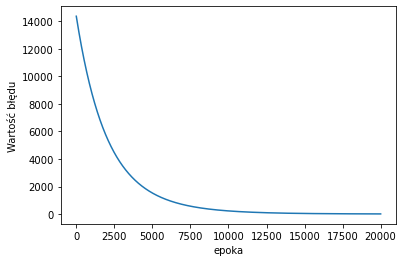

In [6]:
plt.plot(range(len(error)), error)
plt.xlabel('epoka')
plt.ylabel('Wartość błędu')
plt.show()

In [1]:
'- Wraz ze wzrostem liczby epok maleje wartość błedu, która w badanym przypadku po wejściu w około 10000 epokę spada praktycznie do zera'

'- Wraz ze wzrostem liczby epok maleje wartość błedu, która w badanym przypadku po wejściu w około 10000 epokę spada praktycznie do zera'

In [85]:
'- Im większa wartość współczynnika uczenia alpha, tym szybciej wartość błędu w początkowych epokach jest równa zeru'

'- Im większa wartość współczynnika uczenia alpha, tym szybciej wartość błędu w początkowych epokach jest równa zeru'

In [86]:
'- Wykres potwierdza to, że dane w przykładzie są wysoce liniowo zależne'

'- Wykres potwierdza to, że dane w przykładzie są wysoce liniowo zależne'